Библиотека технического анализа Pandas TA для Python

Baseline из видео: https://www.youtube.com/watch?v=VDtqdTr5QZc

По сути запускается то, что прописано в описании самой библиотеки, удобство в том, что сняли по инструкции видео. Сама библиотека находится по адресу https://github.com/twopirllc/pandas-ta

In [2]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 8.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=fdb70dfc2773eed7b42ba1419372492a8a536c3a32011d757bdc4ce0a7004b5b
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import pandas as pd
import pandas_ta as ta
import yfinance
import matplotlib.pyplot as plt


In [5]:
df = pd.DataFrame()
df = df.ta.ticker('AAPL', period = '5y')

Группы индикаторов:

In [6]:
df.ta.categories

['candles',
 'cycles',
 'momentum',
 'overlap',
 'performance',
 'statistics',
 'trend',
 'volatility',
 'volume']

Список всех индикаторов:

In [7]:
df.ta.indicators(as_list=True)

['aberration',
 'above',
 'above_value',
 'accbands',
 'ad',
 'adosc',
 'adx',
 'alma',
 'amat',
 'ao',
 'aobv',
 'apo',
 'aroon',
 'atr',
 'bbands',
 'below',
 'below_value',
 'bias',
 'bop',
 'brar',
 'cci',
 'cdl_pattern',
 'cdl_z',
 'cfo',
 'cg',
 'chop',
 'cksp',
 'cmf',
 'cmo',
 'coppock',
 'cross',
 'cross_value',
 'cti',
 'decay',
 'decreasing',
 'dema',
 'dm',
 'donchian',
 'dpo',
 'ebsw',
 'efi',
 'ema',
 'entropy',
 'eom',
 'er',
 'eri',
 'fisher',
 'fwma',
 'ha',
 'hilo',
 'hl2',
 'hlc3',
 'hma',
 'hwc',
 'hwma',
 'ichimoku',
 'increasing',
 'inertia',
 'jma',
 'kama',
 'kc',
 'kdj',
 'kst',
 'kurtosis',
 'kvo',
 'linreg',
 'log_return',
 'long_run',
 'macd',
 'mad',
 'massi',
 'mcgd',
 'median',
 'mfi',
 'midpoint',
 'midprice',
 'mom',
 'natr',
 'nvi',
 'obv',
 'ohlc4',
 'pdist',
 'percent_return',
 'pgo',
 'ppo',
 'psar',
 'psl',
 'pvi',
 'pvo',
 'pvol',
 'pvr',
 'pvt',
 'pwma',
 'qqe',
 'qstick',
 'quantile',
 'rma',
 'roc',
 'rsi',
 'rsx',
 'rvgi',
 'rvi',
 'short_run'

Помощь по конкретному индикатору.

In [8]:
help(ta.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, talib=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = n

Добавим индикатор rsi и ema длиной десять по столбцам закрытия.

In [9]:
df['rsi'] = ta.rsi(close = df.Close, length=10)

In [10]:
df['ema'] = ta.ema(close = df.Close, length=10)

Выведем датафрейм с данными, в которые добавили выше два столбца.  
Всё чётко за пять лет.

In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,ema
Date,,,,,,,,,
2017-10-16 00:00:00-04:00,37.464361,37.962622,37.405044,37.934151,96486000,0.0,0.0,NaN,NaN
2017-10-17 00:00:00-04:00,37.910409,38.169028,37.779912,38.074123,75989200,0.0,0.0,NaN,NaN
2017-10-18 00:00:00-04:00,38.062263,38.131072,37.867706,37.905666,65496800,0.0,0.0,NaN,NaN
2017-10-19 00:00:00-04:00,37.191504,37.269803,36.781034,37.008808,170336800,0.0,0.0,NaN,NaN
2017-10-20 00:00:00-04:00,37.158288,37.428772,37.004067,37.072872,95896400,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-07 00:00:00-04:00,142.539993,143.100006,139.449997,140.089996,85859100,0.0,0.0,33.616868,145.507423
2022-10-10 00:00:00-04:00,140.419998,141.889999,138.570007,140.419998,74899000,0.0,0.0,34.442648,144.582437
2022-10-11 00:00:00-04:00,139.899994,141.350006,138.220001,138.979996,77033700,0.0,0.0,32.483473,143.563811


Пошла визуализация.  

<function matplotlib.pyplot.show(*args, **kw)>

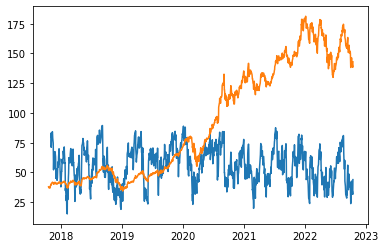

In [12]:
plt.plot(df.rsi)
plt.plot(df.Close)
plt.show

Создадим класс стратегии, чтобы создать наш датафрейм под наши требования.  

In [13]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)

И запустим стратегию.  

In [14]:
df.ta.strategy(CustomStrategy)

С такой стратегией сформирован следующий датафрейм:  

In [15]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,ema,SMA_50,...,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,VOLUME_SMA_20
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-16 00:00:00-04:00,37.464361,37.962622,37.405044,37.934151,96486000,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-17 00:00:00-04:00,37.910409,38.169028,37.779912,38.074123,75989200,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-18 00:00:00-04:00,38.062263,38.131072,37.867706,37.905666,65496800,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19 00:00:00-04:00,37.191504,37.269803,36.781034,37.008808,170336800,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-20 00:00:00-04:00,37.158288,37.428772,37.004067,37.072872,95896400,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 00:00:00-04:00,142.539993,143.100006,139.449997,140.089996,85859100,0.0,0.0,33.616868,145.507423,158.665363,...,137.854767,149.871997,161.889227,16.036658,0.093001,35.510159,-4.522063,-0.320901,-4.201162,102742990.0
2022-10-10 00:00:00-04:00,140.419998,141.889999,138.570007,140.419998,74899000,0.0,0.0,34.442648,144.582437,158.228071,...,137.756853,148.721497,159.686141,14.745204,0.121442,36.085801,-4.678011,-0.381479,-4.296532,101240140.0
2022-10-11 00:00:00-04:00,139.899994,141.350006,138.220001,138.979996,77033700,0.0,0.0,32.483473,143.563811,157.781952,...,136.500049,147.978497,159.456946,15.513671,0.108026,34.633073,-4.882863,-0.469065,-4.413798,98958995.0
